<img src="https://github.com/luishernand/pandas_fundamentals/blob/master/logo4.JPG?raw=true" height = 200 width=300 alt=" ">

# Predict Employee Attrition Using Machine Learning & Python  
**Autor:** [Computer Science]( http://everythingcomputerscience.com/)  
**Descripción:**  Este es un programa para predecir la deserción de los empleados   

|Email|Fecha|
|-----|-----|
|luishernandezmatos@yahoo.com|28 de mayo 2020|

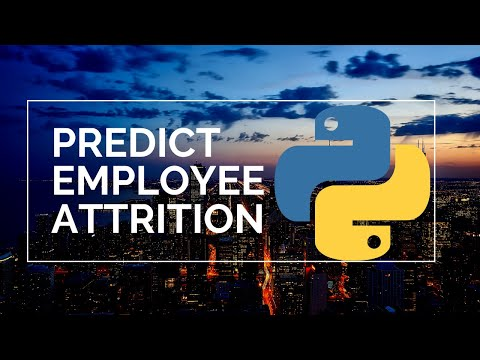

In [239]:
from IPython.display import YouTubeVideo
YouTubeVideo('CpCs--DpJh0')

**La deserción de los empleados** se define como el proceso natural por el cual los empleados dejan la fuerza laboral, por ejemplo, por renuncia por razones personales o jubilación, y no son reemplazados de inmediato  

<img src="https://toolbox.brightspotcdn.com/dims4/default/f9aa5a4/2147483647/resize/800x%3E/quality/90/?url=http%3A%2F%2Fziff-davis-brightspot.s3.amazonaws.com%2F8d%2Fca%2F5393916041989ab45fef2298e78d%2Fwhat-is-employee-attrition.png">

Algunas formas de desgaste son inevitables, como si un empleado se retira o se muda a otra ciudad. Pero después de un cierto umbral, el desgaste puede hacer mella en los resultados de su empresa, así como en su cultura. En este manual, le contamos todo lo que necesita saber sobre el desgaste de los empleados y cómo medirlo con precisión.
El desgaste es una parte inevitable de cualquier negocio. Llegará un momento en que un empleado quiera abandonar su empresa, ya sea por razones personales o profesionales.

Pero cuando la deserción cruza un umbral particular, se convierte en un motivo de preocupación. Por ejemplo, el desgaste entre grupos de empleados minoritarios podría estar perjudicando la diversidad en su organización. O bien, el desgaste entre los líderes superiores puede conducir a una brecha significativa en el liderazgo organizacional. ¿Sabe dónde se encuentra su empresa en la curva de deserción de empleados?

---  
## Librerias a utilizar
---

In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

### Cargar los datos

In [241]:
df = pd.read_csv('https://raw.githubusercontent.com/nelson-wu/employee-attrition-ml/master/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##### copia de datos crudos

In [242]:
data = df.copy()

### Información general de los datos

In [243]:
df.shape

(1470, 35)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

### Estadística Basica

In [245]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Análisis de deserción

##### 1. Cantidad de desrciones

In [246]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

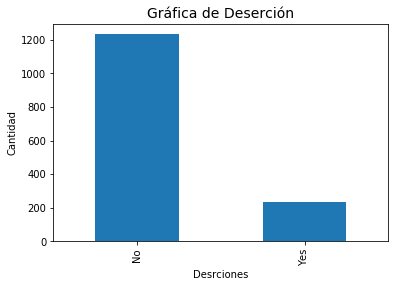

In [247]:
plt.title('Gráfica de Deserción', size = 14)
plt.ylabel('Cantidad', size = 10)
plt.xlabel('Desrciones', size = 10)
df.Attrition.value_counts().plot(kind= 'bar')
plt.show()

##### 2. Porcentaje de deserciones

In [248]:
df.Attrition.value_counts(normalize = True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

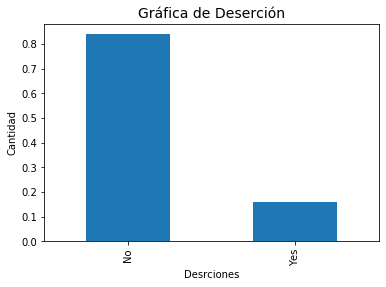

In [249]:
plt.title('Gráfica de Deserción', size = 14)
plt.ylabel('Cantidad', size = 10)
plt.xlabel('Desrciones', size = 10)
df.Attrition.value_counts(normalize = True).plot(kind= 'bar')
plt.show()

##### 3. Promedio de edad de las deserciones

In [250]:
df.groupby('Attrition').Age.mean()

Attrition
No     37.561233
Yes    33.607595
Name: Age, dtype: float64

##### 4. Promedio de edad de de las deserciones por departamentos

In [251]:
departamentos = df.pivot_table(index='Attrition', columns='Department', values='Age', aggfunc=np.mean).T
departamentos.No

Department
Human Resources           39.627451
Research & Development    37.615942
Sales                     37.135593
Name: No, dtype: float64

##### 5.  porcentaje de salida del promedio edad de de las deserciones por departamentos

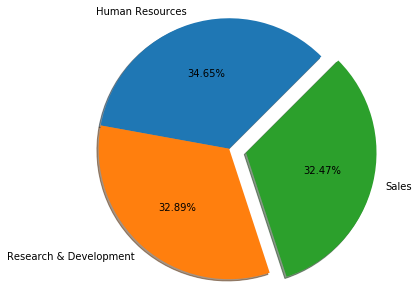

In [252]:
plt.axis('equal')
labels = ["Human Resources",'Research & Development', 'Sales']
plt.pie(departamentos.No, labels = labels, shadow = True, autopct='%1.2f%%',radius=1.5, explode=[0,0,0.2], startangle=45,
       counterclock=True)
plt.show()

##### 6. Cantidad de salidas por departamentos

In [253]:
df['conteo'] =1
a = df.pivot_table(index='Attrition', columns='Department', values='conteo', aggfunc=sum).T
a.No

Department
Human Resources            51
Research & Development    828
Sales                     354
Name: No, dtype: int64

##### 7. porcentaje de salidas por departamentos

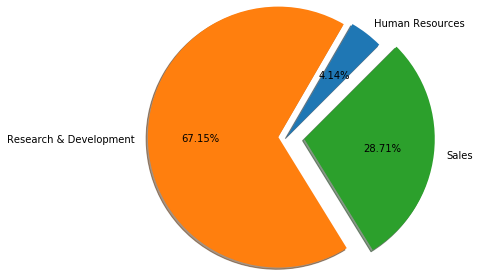

In [254]:
plt.axis('equal')
labels = ["Human Resources",'Research & Development', 'Sales']
plt.pie(a.No, labels = labels, shadow = True, autopct='%1.2f%%',radius=1.5, explode=[0,0.1,0.2], startangle=45,
       counterclock=True)
plt.show()

##### 8. Cual es su nivel de educación

In [255]:
e = df.pivot_table(index='Attrition', columns = "EducationField", values ='conteo', aggfunc=sum).T
e.No

EducationField
Human Resources      20
Life Sciences       517
Marketing           124
Medical             401
Other                71
Technical Degree    100
Name: No, dtype: int64

##### 9. Porcentaje del nivel de educación

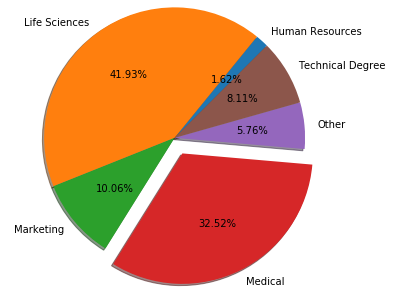

In [256]:
plt.axis('equal')
labels = ["Human Resources",'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
plt.pie(e.No, labels = labels, shadow = True, autopct='%1.2f%%',radius=1.5, explode=[0,0,0,0.2,0,0], startangle=45,
       counterclock=True)
plt.show()

##### 10. Indagar si las deserciones tienen que ver con los viajes

In [257]:
bus = df.pivot_table(index = 'Attrition', columns=['Department', 'BusinessTravel'], values='conteo', aggfunc=sum).T
bus.No

Department              BusinessTravel   
Human Resources         Non-Travel             6.0
                        Travel_Frequently      7.0
                        Travel_Rarely         38.0
Research & Development  Non-Travel            89.0
                        Travel_Frequently    145.0
                        Travel_Rarely        594.0
Sales                   Non-Travel            43.0
                        Travel_Frequently     56.0
                        Travel_Rarely        255.0
Name: No, dtype: float64

---  
### Preparar la data el aprendizaje Automatizado
---

1. [x] Eliminar columnas
1. [x] Verificar la correlación de los datos 
1. [x] Transformar los datos categorícos a Númericos
1. [x] seleccionar los datos de las variables X-y

In [258]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'conteo'],
      dtype='object')

In [259]:
#columnas = ['Over18','EmployeeNumber' 'StandardHours','EmployeeCount', 'conteo' ]
df = df.drop(['Over18','EmployeeNumber' , 'StandardHours','EmployeeCount', 'conteo' ], axis =1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


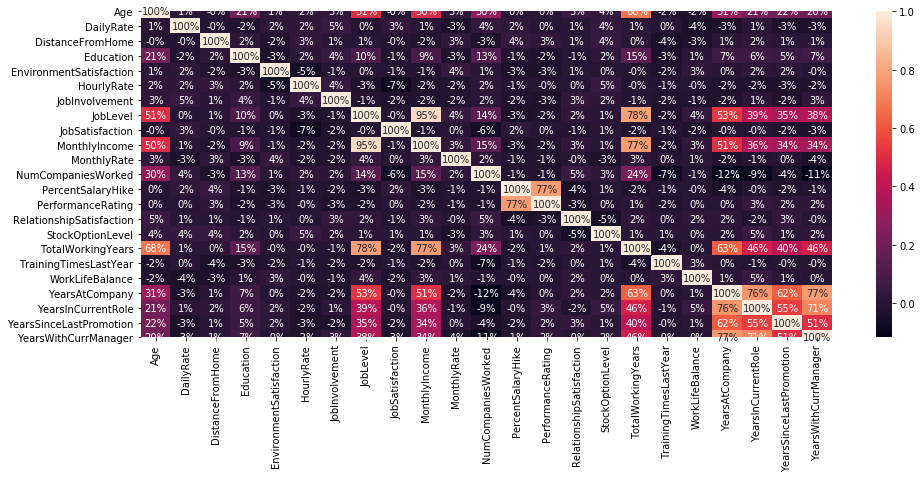

In [260]:
plt.figure(figsize =(15.5,6))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()

In [261]:
# transoformación de s datos
from sklearn.preprocessing import LabelEncoder

In [262]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [263]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,31,0,1,113,1,7,0,1,2,1,...,1,3,1,10,3,2,10,7,1,7
2,19,1,2,805,1,1,1,4,3,1,...,0,1,0,7,3,2,0,0,0,0
3,15,0,1,820,1,2,3,1,3,0,...,0,2,0,8,3,2,8,7,3,0
4,9,0,2,312,1,1,0,3,0,1,...,0,3,1,6,3,2,2,2,2,2


In [264]:
#variables dependiente e independiente (x,y)
X = df.drop('Attrition', axis = 'columns').values
y = df.Attrition.values
X.shape, y.shape

((1470, 30), (1470,))

###  Dividir los datos en training and test 25% de testeo  
por defecto el test_size =0.25

In [265]:
from sklearn.model_selection import train_test_split

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

### Modelo Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier

In [331]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [332]:
#scrore de entrenamiento
rf.score(X_train, y_train)

1.0

In [333]:
y_pred = rf.predict(X_test)
result = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
result.head(10)

,Actual,Predicted
0,0,0
1,0,0
2,1,0
3,0,0
4,1,1
5,0,0
6,1,0
7,0,0
8,0,0
9,1,0


#### Evaluar el Modelo

In [271]:
from sklearn import metrics

In [334]:
metrics.accuracy_score(y_test, y_pred)

0.8641304347826086

In [335]:
f1 = metrics.classification_report(y_test, y_pred)
print(f1)

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       310
           1       0.83      0.17      0.29        58

   micro avg       0.86      0.86      0.86       368
   macro avg       0.85      0.58      0.61       368
weighted avg       0.86      0.86      0.82       368



##### El modelo tiene una buena presición, pero el recall es muy malo, esto se debe a que la data es desbalenciada a pesar de esto tiene un buen score

<img src="https://www.juanbarrios.com/wp-content/uploads/2019/07/Fig3-1024x627.png" height = 300 width=300 alt=" ">

In [336]:
#matriz de confusion
metrics.confusion_matrix(y_test, y_pred)

array([[308,   2],
       [ 48,  10]], dtype=int64)

#### Ver cuales son los falson negativos  
FN es la cantidad de positivos que fueron clasificados incorrectamente como negativos. Error tipo 2 (Falsos Negativos)

In [337]:
FN = result[y_pred > y_test]
FN

,Actual,Predicted
28,0,1
90,0,1


In [338]:
data.iloc[[28,90]]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
28,44,No,Travel_Rarely,477,Research & Development,7,4,Medical,1,36,...,4,80,1,24,4,3,22,6,5,17
90,40,No,Travel_Frequently,530,Research & Development,1,4,Life Sciences,1,119,...,4,80,1,22,3,2,22,3,11,11


##### Ver los falsos positivos  
FP es la cantidad de negativos que fueron clasificados incorrectamente como positivos. Error tipo 1 (Falsos positivos)

In [339]:
FP = result[y_pred < y_test]
FP

,Actual,Predicted
2,1,0
6,1,0
9,1,0
11,1,0
13,1,0
17,1,0
33,1,0
38,1,0
45,1,0
49,1,0


In [340]:
data.iloc[[2,6]]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
